# HOS09A - Computer Vision – Text Classification
Subject: COS506 Programming for Computing  
Student: Verónica Elze

# Section 2: Text Classification with Keras 

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
# load data
data = keras.datasets.imdb

# load the 10000 most frequently used thru out the whole dataset.
(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words=10000)

# display data
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


## Create Map between Word & Numbers

In [3]:
# map the words
word_index = data.get_word_index()

# adjust indexes to add padding and other special tokens
word_index = {word:(num+3) for word, num in word_index.items()}
word_index["<PAD>"] = 0  # will be used later to set length for all data
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# reverse mapping of indexes to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# decode to readable english
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, "?") for i in text])

print(decode_review(train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

## Data Pre-processing

In [4]:
# check length of 2 reviews
print(len(train_data[0]), len(test_data[1]))

218 260


In [5]:
# truncate data
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"],
                                                        padding="post", maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"],
                                                       padding="post", maxlen=256)

# check length of 2 reviews again after truncating
print(len(test_data[0]), len(test_data[1]))

256 256


## Build Model

In [6]:
# build model
model = keras.Sequential()
model.add(keras.layers.Embedding(10000, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))  # numbers will be between 0-1

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Compile Model

In [7]:
# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

## Evaluate & Test Model

In [8]:
# validate the model
# take up to 10000th reviews
x_val = train_data[:10000]
y_val = train_labels[:10000]

x_train = train_data[10000:]
y_train = train_labels[10000:]

# train the model by passing the dataset object to the fit method.
# batch_size: how many reviews we will load
fitModel = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

# evaluate model
result = model.evaluate(test_data, test_labels)

print(result)

# test model
test_review = test_data[0]
predict = model.predict(np.array([test_review]))
print("Review: " + decode_review(test_review))
print("Prediction: " + str(predict[0]))
print("Actual: " + str(test_labels[0]))

Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5515 - loss: 0.6918 - val_accuracy: 0.6777 - val_loss: 0.6847
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6953 - loss: 0.6798 - val_accuracy: 0.7093 - val_loss: 0.6655
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7302 - loss: 0.6552 - val_accuracy: 0.7461 - val_loss: 0.6321
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7597 - loss: 0.6169 - val_accuracy: 0.7699 - val_loss: 0.5876
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7760 - loss: 0.5654 - val_accuracy: 0.7925 - val_loss: 0.5384
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8026 - loss: 0.5156 - val_accuracy: 0.8132 - val_loss: 0.4877
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8349 - loss: 0.4619 - val_accuracy: 0.8319 - val_loss: 0.4451
Epoch 8/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8487 - loss: 0.4185 - val_accuracy: 0.8384 - v

## Plot Accuracy & Loss

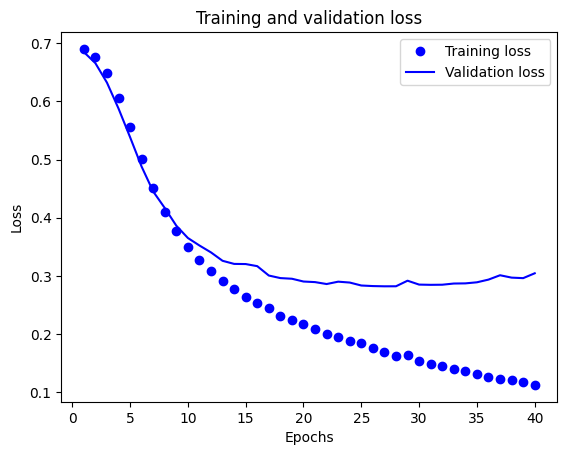

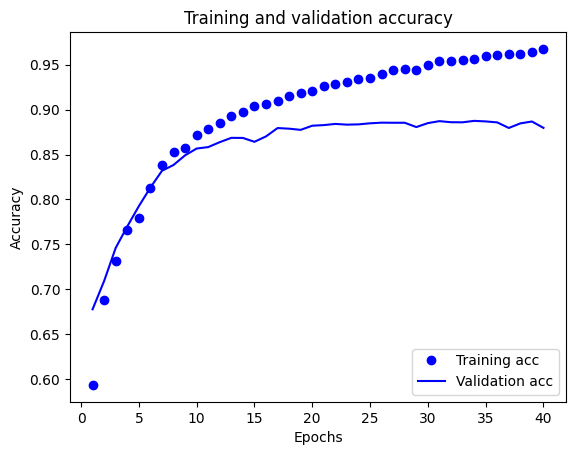

In [9]:
# Create a plot of accuracy and loss over time
history_dict = fitModel.history
history_dict.keys()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# 'b' is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()